<a href="https://colab.research.google.com/github/Ekaterina-Kostina/study/blob/main/Kostina_E_D%2C_h_w_6_scraping_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [13]:
!pip install beautifulsoup4 -q
!pip install requests -q

import requests
from bs4 import BeautifulSoup

In [ ]:
'''
Допишите функцию для скрейпинга
'''

def scrape_text_from_url(url, tag, class_=None):
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
  response = requests.get(url, headers=headers)
  if response.status_code == 200: ### если запрос успешный (возвращается значение 200) ###
      soup = BeautifulSoup(response.text, 'html.parser') ### парсим контент или текст с помощью BeautifulSoup html.parser ###
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = [] ### создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for i in paragraphs: ### начинаем перебор элементов переменной paragraphs ###
        text.append(i.get_text(strip=True)) # извлекаем текстовые данные
      return text
  else: ### иначе ###
      print(f"{response.status_code} Error") ### выводим статус-код и сообщение об ошибке ###
      return []

In [18]:
'''
Проверяем функцию для скрейпинга: пример 1
'''
def scrape_text_from_url(url, tag, class_=None):
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
  response = requests.get(url, headers=headers)
  if response.status_code == 200: ### если запрос успешный (возвращается значение 200) ###
      soup = BeautifulSoup(response.text, 'html.parser') ### парсим контент или текст с помощью BeautifulSoup html.parser ###
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = [] ### создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for p in paragraphs: ### начинаем перебор элементов переменной paragraphs ###
        text.append(p.get_text(strip=True)) # извлекаем текстовые данные
      return text
  else: ### иначе ###
      print(f"{response.status_code} Error") ### выводим статус-код и сообщение об ошибке ###
      return []

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')

["TheChomsky hierarchyin the fields offormal language theory,computer science, andlinguistics, is acontainment hierarchyof classes offormal grammars. A formal grammar describes how to form strings from a language's vocabulary (or alphabet) that are valid according to the language's syntax. The linguistNoam Chomskytheorized that four different classes of formal grammars existed that could generate increasingly complex languages. Each class can also completely generate the language of all inferior classes (set inclusive).",
 'The general idea of a hierarchy of grammars was first described by Noam Chomsky in "Three models for the description of language" during the formalization oftransformational-generative grammar(TGG).[1]Marcel-Paul Schützenbergeralso played a role in the development of the theory offormal languages; the paper "The algebraic theory of context free languages"[2]describes the modern hierarchy, including context-free grammars.[3]',
 'Independently, alongside linguists, ma

In [19]:
'''
Проверяем функцию для скрейпинга: пример 2
'''
def scrape_text_from_url(url, tag, class_=None):
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
  response = requests.get(url, headers=headers)
  if response.status_code == 200: ### если запрос успешный (возвращается значение 200) ###
      soup = BeautifulSoup(response.text, 'html.parser') ### парсим контент или текст с помощью BeautifulSoup html.parser ###
      paragraphs = soup.find_all(tag, class_) # ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      text = [] ### создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for p in paragraphs: ### начинаем перебор элементов переменной paragraphs ###
        text.append(p.get_text(strip=True)) # извлекаем текстовые данные
      return text
  else: ### иначе ###
      print(f"{response.status_code} Error") ### выводим статус-код и сообщение об ошибке ###
      return []
scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')

['Civil War is not a film about why extreme division happens; it’s about the personal impact of division at its worst.',
 'A staggering and frequently brilliant film looking at a hopefully just fictionalized version of America destroying itself from within.',
 'Garland seems poised to be make political points, to show how our current political dysfunction could lead to something far worse… but he never follows through.',
 'This violent tale of anaesthetised reporters is just a war yarn with a twist.',
 'This easy digital fakeness is there to get the audience used to it...',
 'Rather than glorifying war, the film is artful and meditative, making us feel the pointlessness of this violence, how unglamorous and exhausting and unheroic it is.',
 'It’s not always subtle, and in some cases it’s even frustrating with some of its narrative decisions, but nothing can deny its uncanny ability to leave you horrified by how war, civil or otherwise, can be truly monstrous from any humanist angle.',


**Задание 2**
Написать функцию для сентимент-анализа

In [20]:
'''
Загружаем списки слов с положительным и отрицательным значением
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt

with open('neg.txt') as f:
  neg = f.read()

with open('pos.txt') as f:
  pos = f.read()

--2024-12-13 20:35:42--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt’

neg.txt             100%[===================>]  43.71K  --.-KB/s    in 0.004s  

2024-12-13 20:35:42 (11.7 MB/s) - ‘neg.txt’ saved [44759/44759]

--2024-12-13 20:35:43--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Saving t

In [23]:
'''
Создайте списки слов, разделив строку по знаку \n
'''

pos_list, neg_list = pos.split(), neg.split() ### ваш код здесь ###

pos_list[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [ ]:
'''
Допишите функцию для анализа тональности
Функция принимает на вход 3 аргумента:
  - переменную text с текстов для анализа
  - 2 списка со словами для анализа тональности: positive_words и negative_words
'''
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    lower_text = text.lower()
    split_text = lower_text.split() ### Ваш код здесь: приведите текст к нижнему регистру и поделите его на слова ###
    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    with open('stopwords.txt', 'r') as f:
      stopwords = f.read().split()
    clean_text = []
    for token in split_text:
      if token not in stopwords:  # проверяем отсутствие токена в списке стоп-слов
        clean_text.append(token)  # добавляем токен в новый очищенный список токенов, если его нет в стоп-словах
    words = clean_text ### Важно: запишите результат в переменную words ###

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
        sentiment = "Positive"
    elif positive_count < negative_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment
     ### Ваш код здесь: если положительный скор больше отрицательного, возвращаем строчку 'positive' ###
    ### Ваш код здесь: если отрицательный скор больше положительного, возвращаем строчку 'negative' ###
    ### Иначе возвращаем строчку 'neutral' ###

In [26]:
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt -q

In [31]:
'''
Проверяем функцию для анализа тональности: пример 1
'''
def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    lower_text = text.lower()
    split_text = lower_text.split() ### Ваш код здесь: приведите текст к нижнему регистру и поделите его на слова ###
    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    with open('stopwords.txt', 'r') as f:
      stopwords = f.read().split()
    clean_text = []
    for token in split_text:
      if token not in stopwords:  # проверяем отсутствие токена в списке стоп-слов
        clean_text.append(token)  # добавляем токен в новый очищенный список токенов, если его нет в стоп-словах
    words = clean_text ### Важно: запишите результат в переменную words ###

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
        sentiment = "Positive"
    elif positive_count < negative_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return(sentiment)

analyze_sentiment('This sample text is awesome!', pos_list, neg_list)

'Neutral'

In [29]:
'''
Проверяем функцию для анализа тональности: пример 2
'''
def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    lower_text = text.lower()
    split_text = lower_text.split() ### Ваш код здесь: приведите текст к нижнему регистру и поделите его на слова ###
    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    with open('stopwords.txt', 'r') as f:
      stopwords = f.read().split()
    clean_text = []
    for token in split_text:
      if token not in stopwords:  # проверяем отсутствие токена в списке стоп-слов
        clean_text.append(token)  # добавляем токен в новый очищенный список токенов, если его нет в стоп-словах
    words = clean_text ### Важно: запишите результат в переменную words ###

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
        sentiment = "Positive"
    elif positive_count < negative_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return(sentiment)

analyze_sentiment('I hate this sample text.', pos_list, neg_list)

'Negative'

In [30]:
'''
Проверяем функцию для анализа тональности: пример 3
'''
def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    lower_text = text.lower()
    split_text = lower_text.split() ### Ваш код здесь: приведите текст к нижнему регистру и поделите его на слова ###
    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    with open('stopwords.txt', 'r') as f:
      stopwords = f.read().split()
    clean_text = []
    for token in split_text:
      if token not in stopwords:  # проверяем отсутствие токена в списке стоп-слов
        clean_text.append(token)  # добавляем токен в новый очищенный список токенов, если его нет в стоп-словах
    words = clean_text ### Важно: запишите результат в переменную words ###

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
        sentiment = "Positive"
    elif positive_count < negative_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return(sentiment)
analyze_sentiment('We love and hate this sample text at the same time!', pos_list, neg_list)

'Neutral'

**Задача 3**

Написать функцию для вывода сентимент-скоров

In [ ]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

def analyze(positive_words, negative_words, url, tag, class_= None):
  scraped_text = scrape_text_from_url(url, tag, class_) ### ваш код здесь: примените функцию scrape_text_from_url ###
  full_text = " ".join(scraped_text)
  sentences = full_text.split('.')
  sentiments = [] ### ваш код здесь: создаем пустой список, куда запишем скоры ###
  for sentence in sentences: ### ваш код здесь: начинаем перебор по предложениям ###
    score = analyze_sentiment(sentence, positive_words, negative_words) ### ваш код здесь: получаем скор для данного предложения с помощью функции analyze_sentiment ###
    sentiments.append(score) ### ваш код здесь: добавляем скор в созданный список ###
  return(sentiments) ### ваш код здесь: возвращаем список скоров ###

In [34]:
'''
Тест 1
'''
def analyze(positive_words, negative_words, url, tag, class_= None):
  scraped_text = scrape_text_from_url(url, tag, class_) ### ваш код здесь: примените функцию scrape_text_from_url ###
  full_text = " ".join(scraped_text)
  sentences = full_text.split('.')
  sentiments = [] ### ваш код здесь: создаем пустой список, куда запишем скоры ###
  for sentence in sentences: ### ваш код здесь: начинаем перебор по предложениям ###
    score = analyze_sentiment(sentence, positive_words, negative_words) ### ваш код здесь: получаем скор для данного предложения с помощью функции analyze_sentiment ###
    sentiments.append(score) ### ваш код здесь: добавляем скор в созданный список ###
  return(sentiments) ### ваш код здесь: возвращаем список скоров ###
analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative']

In [35]:
'''
Тест 2
'''
def analyze(positive_words, negative_words, url, tag, class_= None):
  scraped_text = scrape_text_from_url(url, tag, class_) ### ваш код здесь: примените функцию scrape_text_from_url ###
  full_text = " ".join(scraped_text)
  sentences = full_text.split('.')
  sentiments = [] ### ваш код здесь: создаем пустой список, куда запишем скоры ###
  for sentence in sentences: ### ваш код здесь: начинаем перебор по предложениям ###
    score = analyze_sentiment(sentence, positive_words, negative_words) ### ваш код здесь: получаем скор для данного предложения с помощью функции analyze_sentiment ###
    sentiments.append(score) ### ваш код здесь: добавляем скор в созданный список ###
  return(sentiments) ### ваш код здесь: возвращаем список скоров ###
analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]

['Negative',
 'Neutral',
 'Negative',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral']

**Задача 4**

Визуализировать результаты анализа

In [52]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://en.wikipedia.org/wiki/Capybara', tag='p', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://en.wikipedia.org/wiki/Red_Dead_Redemption', tag='p', positive_words=pos, negative_words=neg))

sample1
sample2

Counter({'Neutral': 116, 'Negative': 109, 'Positive': 64})

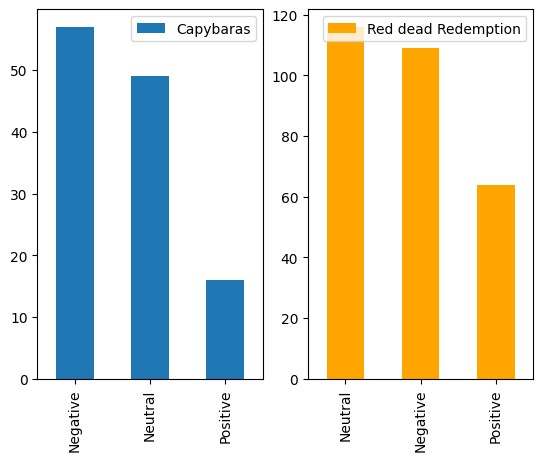

In [54]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample1, orient='index', columns=['Capybaras'])
df2 = pd.DataFrame.from_dict(sample2, orient='index', columns=['Red dead Redemption'])

fig, ax = plt.subplots(ncols=2)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='orange')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать **рефакторинг**: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

In [56]:
### №1
def scrape_text_from_url(url, tag, class_=None):
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
  response = requests.get(url, headers=headers)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all(tag, class_)
    text = []
    for p in paragraphs:
      text.append(p.get_text(strip=True))
    return text
  else:
      print(f"{response.status_code} Error")
      return []

### review
### строки 8-10 можно сократить с помощью list comprehension:
### text = [p.get_text(strip=True) for p in paragraphs]
### добавим промежуточный вывод результатов после строки 5
### print(f"Статус запроса: {response.status_code} - ответ получен"

### новая версия
def scrape_text_from_url(url, tag, class_=None):
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
  response = requests.get(url, headers=headers)
  if response.status_code == 200:
    print(f"Статус запроса: {response.status_code} - ответ получен")
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all(tag, class_)
    text = [p.get_text(strip=True) for p in paragraphs]
    return text
  else:
      print(f"{response.status_code} Error")
      return []


In [69]:
def scrape_text_from_url(url, tag, class_=None):
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
  response = requests.get(url, headers=headers)
  if response.status_code == 200:
    print(f"Статус запроса: {response.status_code} - ответ получен")
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.find_all(tag, class_)
    text = [p.get_text(strip=True) for p in paragraphs]
    return text
  else:
      print(f"{response.status_code} Error")
      return []

In [62]:
### №2
def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    lower_text = text.lower()
    split_text = lower_text.split()
    with open('stopwords.txt', 'r') as f:
      stopwords = f.read().split()
    clean_text = []
    for token in split_text:
      if token not in stopwords:
        clean_text.append(token)
    words = clean_text
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
        sentiment = "Positive"
    elif positive_count < negative_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return(sentiment)

### review
### в строках 7-11 применим list comprehension
### clean_text = [token for token in split_text if token not in stopwords
### выведем промежуточный результат для clean_text
### print(f"Чистый текст: {clean_text[:10]}...")

### новая версия
def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    lower_text = text.lower()
    split_text = lower_text.split()
    with open('stopwords.txt', 'r') as f:
      stopwords = f.read().split()
    clean_text = [token for token in split_text if token not in stopwords]
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    print(f"Чистый текст: {clean_text[:10]}")

    if positive_count > negative_count:
        sentiment = "Positive"
    elif positive_count < negative_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return(sentiment)

In [67]:
def analyze_sentiment(text, positive_words, negative_words): ### ваш код здесь ###
    lower_text = text.lower()
    split_text = lower_text.split()
    with open('stopwords.txt', 'r') as f:
      stopwords = f.read().split()
    clean_text = [token for token in split_text if token not in stopwords]
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    print(f"Чистый текст: {clean_text[:10]}")

    if positive_count > negative_count:
        sentiment = "Positive"
    elif positive_count < negative_count:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return(sentiment)

In [65]:
### №3
def analyze(positive_words, negative_words, url, tag, class_= None):
  scraped_text = scrape_text_from_url(url, tag, class_)
  full_text = " ".join(scraped_text)
  sentences = full_text.split('.')
  sentiments = []
  for sentence in sentences:
    score = analyze_sentiment(sentence, positive_words, negative_words)
    sentiments.append(score)
  return(sentiments)

  ### review
  ### применим list comprehension
  ### sentiments = [analyze_sentiment(sentence, positive_words, negative_words) for sentence in sentences]
  ### напечатаем первые 200 символов текста для примера
  ###   print(f"Обработанный текст: {full_text[:100]}")

  ### новая версия
def analyze(positive_words, negative_words, url, tag, class_= None):
  scraped_text = scrape_text_from_url(url, tag, class_)
  full_text = " ".join(scraped_text)
  sentences = full_text.split('.')
  sentiments = [analyze_sentiment(sentence, positive_words, negative_words) for sentence in sentences]
  print(f"Обработанный текст: {full_text[:100]}")
  return(sentiments)

In [66]:
def analyze(positive_words, negative_words, url, tag, class_= None):
  scraped_text = scrape_text_from_url(url, tag, class_)
  full_text = " ".join(scraped_text)
  sentences = full_text.split('.')
  sentiments = [analyze_sentiment(sentence, positive_words, negative_words) for sentence in sentences]
  print(f"Обработанный текст: {full_text[:100]}")
  return(sentiments)